In [1]:
import dd
import numpy as np
import matplotlib.pyplot as plt
from paperlib import pedshtf as pedshtf
from scipy.optimize import curve_fit
from sklearn.isotonic import IsotonicRegression
from rpsavgperf import rpsavgperf
from ipfnpytools.isotonic_regression import isotonic_regression
from paperlib import binMeanDataYY as binMeanDataYY
#
plt.style.use('helvet2')

#### Read the data
##### Edition 4 t=[3.0, 3.2]s
##### Edition 5 t=[4.9, 5.1]s
##### Edition 6 t=[5.5, 5.7]s

In [22]:
shotnr = 32233
#p1 = ppedshtf(shotnr=shotnr, exper='guimas', edition=1, nr_diags=4, elm_exper='AUGD')
#p2 = ppedshtf(shotnr=shotnr, exper='guimas', edition=3, nr_diags=4, elm_exper='AUGD')
p1 = pedshtf(shotnr=shotnr, exper='guimas', edition=4, nr_diags=4, elm_exper='AUGD')
p2 = pedshtf(shotnr=shotnr, exper='guimas', edition=5, nr_diags=4, elm_exper='AUGD')
p3 = pedshtf(shotnr=shotnr, exper='guimas', edition=6, nr_diags=4, elm_exper='AUGD')
pall = [p1, p3]
#pall = [p1, p2, p3]

#### Shifts

In [23]:
print(p1.neRshift)
print(p2.neRshift)
print(p3.neRshift)

[ 0.     0.     0.     0.006 -0.005 -0.     0.044  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]
[ 0.     0.     0.     0.006 -0.005 -0.     0.044  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]
[ 0.     0.     0.     0.006 -0.005 -0.     0.044  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.   ]


In [24]:
cuts_low = [2.135, 2.135, 2.135]
cuts_hi = [3.0, 3.0, 3.0]


cutsl_low = [2.135, 2.135, 2.135]
cutsl_hi = [3.0, 3.0, 3.0]
cutsh_low = [2.12, 2.12, 2.12]
reflfsshift = np.array([0.0, 0.0, 0.0])
refhfsshift = np.array([0.0, 0.0, 0.0])
dotsizeref = 6
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS', 'Ref. HFS']

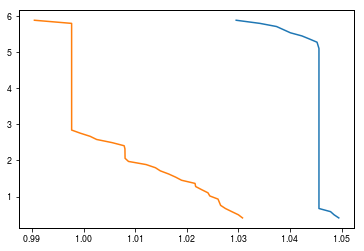

In [25]:
diagind = 3

for timeind in range(2):
    rad = pall[timeind].rad[pall[timeind].indi[diagind]:pall[timeind].indf[diagind]]
    rho = pall[timeind].rhos[pall[timeind].indi[diagind]:pall[timeind].indf[diagind]]
    dens = pall[timeind].dens[pall[timeind].indi[diagind]:pall[timeind].indf[diagind]]*1e-19
    ims = (rad>cuts_low[timeind])&(rad<cuts_hi[timeind])
    
    cut_rho = rho[ims]
    cut_rad = rad[ims]
    cut_dens = dens[ims]
    
    binrad, bindens = binMeanDataYY(cut_rho, cut_dens, binpts=64)
    
    plt.plot(isotonic_regression(binrad, strict=True), bindens)
    
    #plt.scatter(rad[ims], dens[ims])
    

plt.show()

In [6]:
p1.t1
p3.t1

array([5.5], dtype=float32)

#### Average REF LFS profile P1

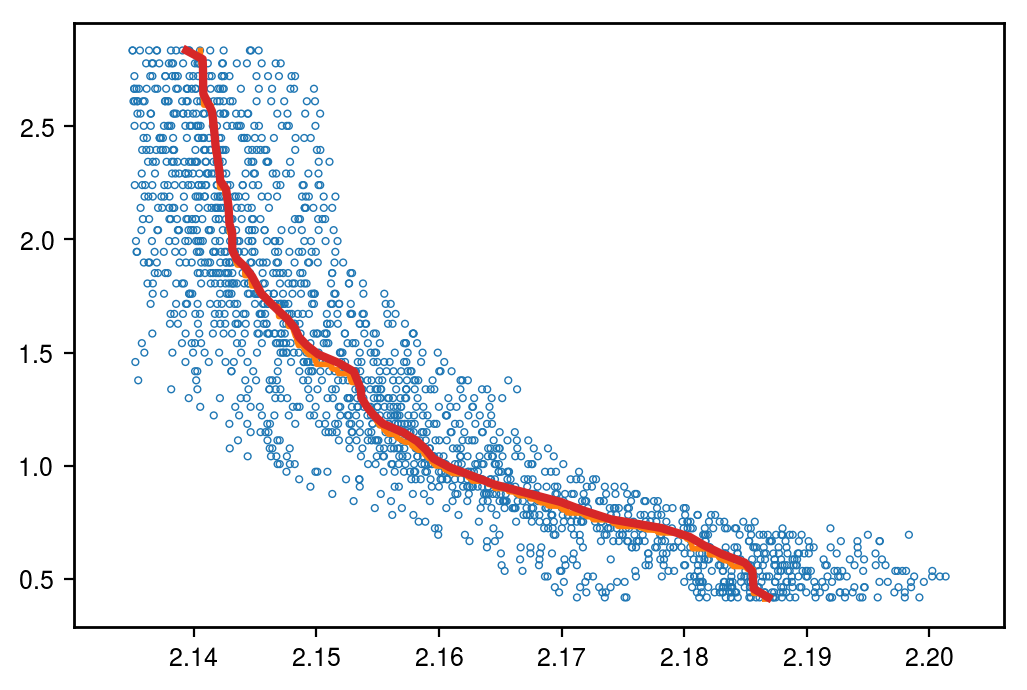

In [7]:
plt.figure(dpi=200)
i=0
lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])
plt.scatter(lrad[lms], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

drl1 = isotonic_regression(lrad[lms], strict=True)
dnl1 = ldens[lms]

indstart = 5
indend = -16
trl1 = drl1[indstart:indend]
tnl1 = dnl1[indstart:indend]

nl1 = isotonic_regression(tnl1, strict=True)
rl1 = isotonic_regression(trl1, strict=True)

xx, yy = binMeanDataYY(lrad[lms], ldens[lms], binpts=64)
a = isotonic_regression(xx, strict=True)

plt.plot(rl1, nl1, c='C1', lw=2)
plt.plot(a, yy, lw=3, c='C3')

plt.show()

#### Average REF HFS profile P1

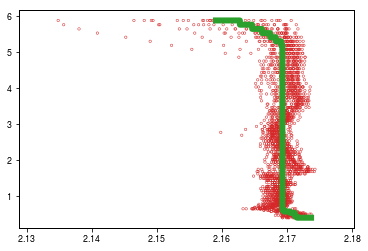

In [8]:
i=0
cutsh_hi = [3.0, 3.0, 3.0]

hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])
plt.scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

drh1 = isotonic_regression(hrad[hms], strict=False)
dnh1 = hdens[hms]

indstart = 0
indend = -1
rh1 = drh1[indstart:indend]
nh1 = dnh1[indstart:indend]

plt.plot(rh1, nh1, c='C2', lw=6)
plt.show()

#### Average REF LFS profile P2

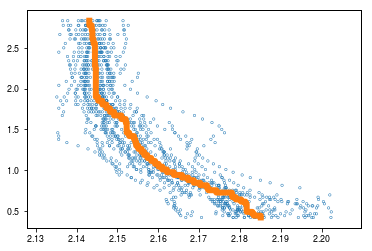

In [9]:
i=1
lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])
plt.scatter(lrad[lms]+reflfsshift[i], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

drl2 = isotonic_regression(lrad[lms])
dnl2 = ldens[lms]

indstart = 3
indend = -1
rl2 = drl2[indstart:indend]
nl2 = dnl2[indstart:indend]

plt.plot(rl2, nl2, c='C1', lw=6)
plt.show()

#### Average REF HFS profile P2

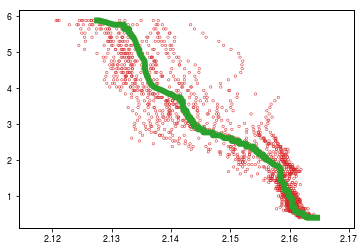

In [10]:
i=1
cutsh_hi = [3.0, 3.0, 3.0]

hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])
plt.scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

rh2 = isotonic_regression(hrad[hms])
nh2 = hdens[hms]

plt.plot(rh2, nh2, c='C2', lw=6)
plt.show()

#### Average REF LFS profile P3

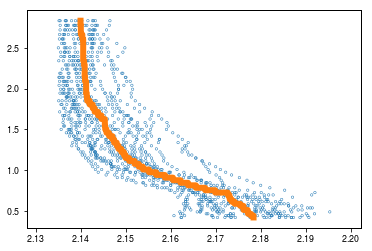

In [11]:
i=2
lrad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
ldens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
lms = (lrad>cutsl_low[i])&(lrad<cutsl_hi[i])
plt.scatter(lrad[lms]+reflfsshift[i], ldens[lms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C0", marker='o')

drl3 = isotonic_regression(lrad[lms])
dnl3 = ldens[lms]

indstart = 5
indend = -12
rl3 = drl3[indstart:indend]
nl3 = dnl3[indstart:indend]

plt.plot(rl3, nl3, c='C1', lw=6)
plt.show()

#### Average REF HFS profile P3

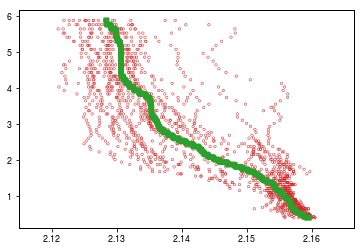

In [12]:
i=2
cutsh_hi = [3.0, 3.0, 3.0]

hrad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
hdens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
hms = (hrad>cutsh_low[i])&(hrad<cutsh_hi[i])
plt.scatter(hrad[hms]+refhfsshift[i], hdens[hms], s=dotsizeref, zorder=1, label=labels[2], facecolors='none', edgecolors="C3", marker='o')

drh3 = isotonic_regression(hrad[hms])
dnh3 = hdens[hms]

indstart = 0
indend = -15
rh3 = drh3[indstart:indend]
nh3 = dnh3[indstart:indend]

plt.plot(rh3, nh3, c='C2', lw=6)
plt.show()

#### Concatenate data

In [13]:
ddnl = [nl1, nl2, nl3]
ddrl = [rl1, rl2, rl3]
ddnh = [nh1, nh2, nh3]
ddrh = [rh1, rh2, rh3]

#### Plots

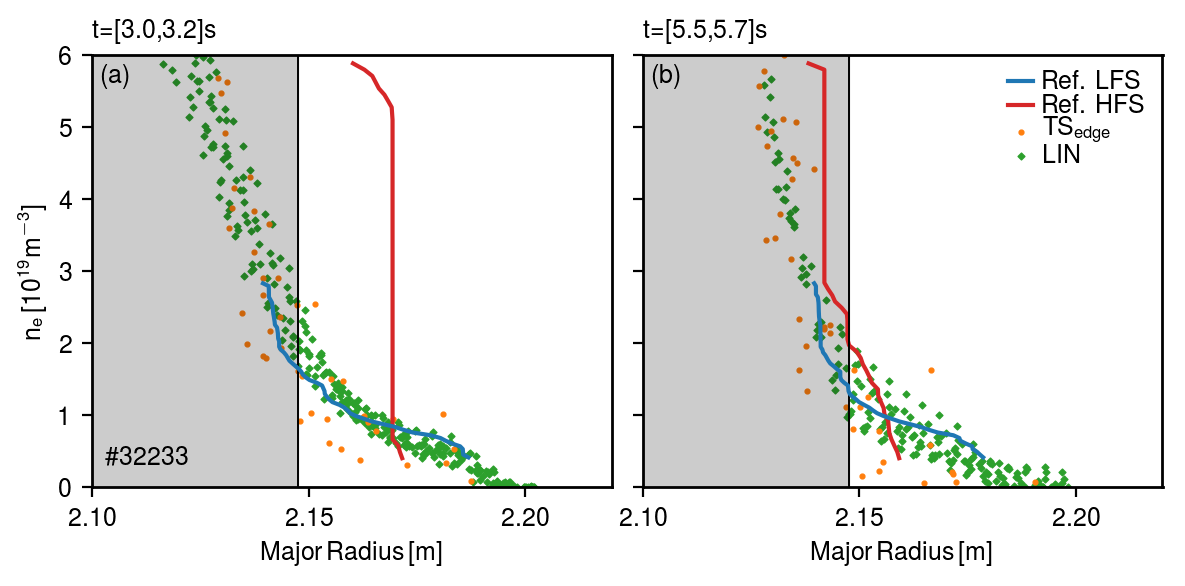

In [32]:
dotsize = 3
dotsizeref = 4
zorder = np.array([1,0,3,2])
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS', 'Ref. HFS']
framebox = [False, True]

textlabels= ['(a)','(b)','(c)']
fpgshift = [0.0,0.0,0.0]

#HFS shifts
### Shifts adjusted for the first time first time

### Shifts adjusted so (b) matches high gradie

#LFS shifts
#Original shifts compensated
#reflfsshift = np.array([p1.neRshift[5],p1.neRshift[5]])
reflfsshift = np.array([0.0,0.0,0.0])

fig, ax = plt.subplots(figsize=(6,3),ncols=2,nrows=1,sharey=True,dpi=200)

#for i in range(len(textlabels)):
for i in range(2):

    #TS edge
    ax[i].scatter(pall[i].rad[pall[i].indi[0]:pall[i].indf[0]], pall[i].dens[pall[i].indi[0]:pall[i].indf[0]]*1e-19,
                  s=dotsize, zorder=zorder[0], label=labels[0],facecolors="C1", marker='o')
    #LIN
    ax[i].scatter(pall[i].rad[pall[i].indi[1]:pall[i].indf[1]], pall[i].dens[pall[i].indi[1]:pall[i].indf[1]]*1e-19,
                  s=dotsize, zorder=zorder[1], label=labels[1],facecolors='C2', marker='D')
    #Plot LFS ref
    rad = pall[i].rad[pall[i].indi[2]:pall[i].indf[2]]
    rho = pall[i].rhos[pall[i].indi[2]:pall[i].indf[2]]
    dens = pall[i].dens[pall[i].indi[2]:pall[i].indf[2]]*1e-19
    ims = (rad>cuts_low[i])&(rad<cuts_hi[i])
    
    cut_rho = rho[ims]
    cut_rad = rad[ims]
    cut_dens = dens[ims]
    
    binrad, bindens = binMeanDataYY(cut_rad, cut_dens, binpts=64)
        
    ax[i].plot(isotonic_regression(binrad, strict=True), bindens, zorder=zorder[2], label=labels[2], color="C0")
    #ax[i].plot(isotonic_regression(ddrl[i]), ddnl[i], zorder=zorder[2], label=labels[2], color="C0")
    #Clean up HFS ref
    rad = pall[i].rad[pall[i].indi[3]:pall[i].indf[3]]
    rho = pall[i].rhos[pall[i].indi[3]:pall[i].indf[3]]
    dens = pall[i].dens[pall[i].indi[3]:pall[i].indf[3]]*1e-19
    ims = (rad>cuts_low[i])&(rad<cuts_hi[i])
    
    cut_rho = rho[ims]
    cut_rad = rad[ims]
    cut_dens = dens[ims]
    
    binrad, bindens = binMeanDataYY(cut_rad, cut_dens, binpts=64)
        
    ax[i].plot(isotonic_regression(binrad, strict=True), bindens, zorder=zorder[3], label=labels[3], color="C3")    
#    ax[i].plot(isotonic_regression(ddrh[i]), ddnh[i], zorder=zorder[3], label=labels[3], color="C3")
    
    #Separatrixes
    ax[i].axvline(pall[0].fpgavg+fpgshift[i], color='k', lw=0.7)
    ax[i].axvspan(2.1, pall[0].fpgavg+fpgshift[i], color='k', alpha=0.2)

    ax[i].set_xlabel(r'$\mathrm{Major\,Radius\,[m]}$')
    
    ax[i].set_ylim(0,6)
    ax[i].set_xlim(2.10,2.22)

    ax[i].set_title('t=[%0.1f,%0.1f]s'%(pall[i].t1,pall[i].t2), loc='left', fontsize=9)

    ax[i].set_xticks([2.10,2.15,2.20])
    ax[i].text(2.102,5.6,textlabels[i], color='k')

    #ax[i].legend(loc='upper right',borderpad=0.1,frameon=framebox[i],handletextpad=-0.3,labelspacing=0.1)

ax[1].legend(loc='upper right',borderpad=0.1,frameon=False,handletextpad=0.4,labelspacing=0.0,handlelength=1)
ax[0].set_ylabel(r'$\mathrm{n_e\,[10^{19}m^{-3}]}$')
ax[0].text(2.103, 0.3,'\#'+str(shotnr),color='k')
#
plt.tight_layout()
plt.subplots_adjust(wspace=0.06)
plt.savefig('Profiles/AUGPED_32233.png',dpi=300)
plt.show()

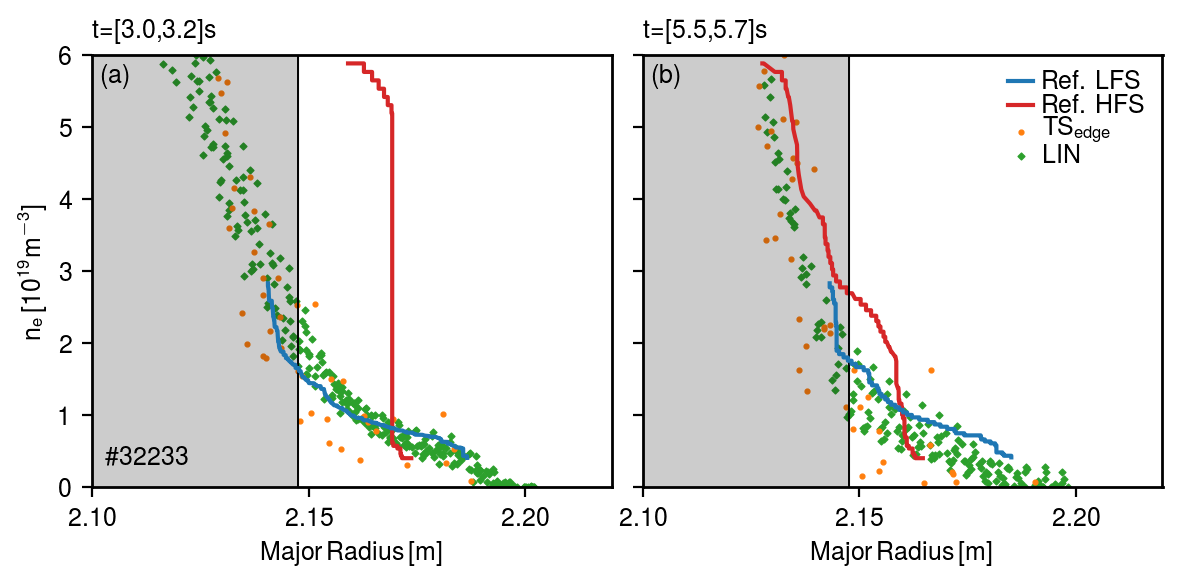

In [28]:
dotsize = 3
dotsizeref = 4
zorder = np.array([1,0,3,2])
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS', 'Ref. HFS']
framebox = [False, True]

textlabels= ['(a)','(b)','(c)']
fpgshift = [0.0,0.0,0.0]

#HFS shifts
### Shifts adjusted for the first time first time

### Shifts adjusted so (b) matches high gradie

#LFS shifts
#Original shifts compensated
#reflfsshift = np.array([p1.neRshift[5],p1.neRshift[5]])
reflfsshift = np.array([0.0,0.0,0.0])

fig, ax = plt.subplots(figsize=(6,3),ncols=2,nrows=1,sharey=True,dpi=200)

#for i in range(len(textlabels)):
for i in range(2):

    #TS edge
    ax[i].scatter(pall[i].rad[pall[i].indi[0]:pall[i].indf[0]], pall[i].dens[pall[i].indi[0]:pall[i].indf[0]]*1e-19,
                  s=dotsize, zorder=zorder[0], label=labels[0],facecolors="C1", marker='o')
    #LIN
    ax[i].scatter(pall[i].rad[pall[i].indi[1]:pall[i].indf[1]], pall[i].dens[pall[i].indi[1]:pall[i].indf[1]]*1e-19,
                  s=dotsize, zorder=zorder[1], label=labels[1],facecolors='C2', marker='D')
    #Plot LFS ref
    ax[i].plot(isotonic_regression(ddrl[i]), ddnl[i], zorder=zorder[2], label=labels[2], color="C0")
    #Clean up HFS ref
    ax[i].plot(isotonic_regression(ddrh[i]), ddnh[i], zorder=zorder[3], label=labels[3], color="C3")
    
    #Separatrixes
    ax[i].axvline(pall[0].fpgavg+fpgshift[i], color='k', lw=0.7)
    ax[i].axvspan(2.1, pall[0].fpgavg+fpgshift[i], color='k', alpha=0.2)

    ax[i].set_xlabel(r'$\mathrm{Major\,Radius\,[m]}$')
    
    ax[i].set_ylim(0,6)
    ax[i].set_xlim(2.10,2.22)

    ax[i].set_title('t=[%0.1f,%0.1f]s'%(pall[i].t1,pall[i].t2), loc='left', fontsize=9)

    ax[i].set_xticks([2.10,2.15,2.20])
    ax[i].text(2.102,5.6,textlabels[i], color='k')

    #ax[i].legend(loc='upper right',borderpad=0.1,frameon=framebox[i],handletextpad=-0.3,labelspacing=0.1)

ax[1].legend(loc='upper right',borderpad=0.1,frameon=False,handletextpad=0.4,labelspacing=0.0,handlelength=1)
ax[0].set_ylabel(r'$\mathrm{n_e\,[10^{19}m^{-3}]}$')
ax[0].text(2.103, 0.3,'\#'+str(shotnr),color='k')
#
plt.tight_layout()
plt.subplots_adjust(wspace=0.06)
plt.savefig('Profiles/All_32233.png',dpi=300)
plt.show()